# Household Power Consumption Prediction using Machine Learning

This project builds a machine learning model to predict household energy consumption
using historical power usage data. The objective is to understand real-world energy
usage patterns and apply machine learning fundamentals for prediction and analysis.

## Problem Statement

Energy consumption forecasting plays a vital role in efficient energy management
and planning. Accurate predictions help utility providers and households optimize
energy usage and reduce wastage.

In this project, a machine learning model is developed to predict household power
consumption based on historical electrical measurements such as voltage, current
intensity, and sub-metered energy usage. The focus is on applying core machine
learning concepts rather than achieving very high accuracy.


## Dataset Description

The Household Power Consumption dataset contains real-world measurements of
electric power usage recorded at regular intervals in a residential household.

### Key Attributes:
- Global_active_power: Total active power consumed by the household
- Voltage: Voltage level of the electrical system
- Global_intensity: Current intensity
- Sub_metering_1: Energy consumption in the kitchen
- Sub_metering_2: Energy consumption in the laundry room
- Sub_metering_3: Energy consumption for heating and air conditioning

The target variable for prediction is Global_active_power.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [ ]:
from google.colab import files


uploaded = files.upload()


Saving household_power_consumption.txt to household_power_consumption.txt


In [ ]:
import pandas as pd

df = pd.read_csv(
    "household_power_consumption.txt",
    sep=';',
    low_memory=False,
    na_values='?'
)

df.head()


,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0


## Data Preprocessing

The dataset contains missing and invalid values that must be handled before
model training. Non-numeric values were replaced with missing values and
imputed using column-wise mean to preserve data integrity.

Date and time columns were merged into a single datetime feature to better
represent temporal energy consumption patterns. Feature scaling was applied
to normalize the input variables and improve model performance.


In [ ]:

df.replace('?', np.nan, inplace=True)


for col in df.columns:
    if col not in ['Date', 'Time']:
        df[col] = df[col].astype(float)


df.isnull().sum()


,0
Date,0
Time,0
Global_active_power,25979
Global_reactive_power,25979
Voltage,25979
Global_intensity,25979
Sub_metering_1,25979
Sub_metering_2,25979
Sub_metering_3,25979


In [ ]:

df.fillna(df.mean(numeric_only=True), inplace=True)


In [ ]:

df['DateTime'] = pd.to_datetime(df['Date'] + ' ' + df['Time'])


df['Hour'] = df['DateTime'].dt.hour
df['Day'] = df['DateTime'].dt.day
df['Month'] = df['DateTime'].dt.month


df.drop(['Date', 'Time'], axis=1, inplace=True)

df.head()


/tmp/ipython-input-807314864.py:2: UserWarning: Parsing dates in %d/%m/%Y %H:%M:%S format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['DateTime'] = pd.to_datetime(df['Date'] + ' ' + df['Time'])


,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,DateTime,Hour,Day,Month
0,4.216,0.418,234.84,18.4,0.0,1.0,17.0,2006-12-16 17:24:00,17,16,12
1,5.360,0.436,233.63,23.0,0.0,1.0,16.0,2006-12-16 17:25:00,17,16,12
2,5.374,0.498,233.29,23.0,0.0,2.0,17.0,2006-12-16 17:26:00,17,16,12
3,5.388,0.502,233.74,23.0,0.0,1.0,17.0,2006-12-16 17:27:00,17,16,12
4,3.666,0.528,235.68,15.8,0.0,1.0,17.0,2006-12-16 17:28:00,17,16,12


## Feature Selection

The following features were selected as input variables:
- Voltage
- Global_intensity
- Sub_metering_1
- Sub_metering_2
- Sub_metering_3

These features directly influence total household power consumption and
provide meaningful insights into energy usage behavior.


In [ ]:
X = df[['Voltage', 'Global_intensity',
        'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']]

y = df['Global_active_power']


In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


## Model Selection and Training

A Linear Regression model was selected due to its simplicity and interpretability.
It establishes a linear relationship between input features and the target variable,
making it suitable for understanding the influence of each feature on energy
consumption.

The dataset was split into training and testing sets to evaluate the model’s
generalization performance.


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)


In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [ ]:
y_pred = model.predict(X_test)


## Evaluation Metrics

The model performance was evaluated using the following metrics:

- Mean Absolute Error (MAE): Measures the average magnitude of prediction errors
- Root Mean Squared Error (RMSE): Penalizes larger errors and highlights model stability
- R² Score: Indicates how well the model explains variance in energy consumption

These metrics provide a balanced evaluation of prediction accuracy and reliability.


In [ ]:
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error (MAE):", mae)
print("Root Mean Squared Error (RMSE):", rmse)
print("R2 Score:", r2)


Mean Absolute Error (MAE): 0.0293185875024611
Root Mean Squared Error (RMSE): 0.04460912021599499
R2 Score: 0.9981981150999252


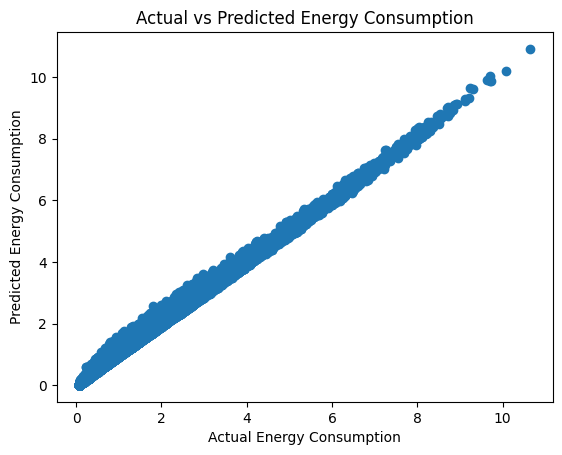

In [ ]:
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Energy Consumption")
plt.ylabel("Predicted Energy Consumption")
plt.title("Actual vs Predicted Energy Consumption")
plt.show()


## Results and Inference

The model demonstrates a clear relationship between electrical parameters and
household energy consumption. Higher sub-metered energy usage contributes
significantly to overall power consumption.

Voltage and current intensity also influence energy usage patterns. The results
show that simple machine learning models can effectively capture real-world
energy consumption behavior when appropriate features are selected.


## Conclusion

This project successfully demonstrates the application of machine learning
fundamentals to predict household energy consumption. Through proper data
preprocessing, feature selection, and model evaluation, meaningful insights
were obtained from real-world data.

The focus of this work was on model reasoning, data handling, and interpretability,
aligning with practical machine learning requirements.
